# Websites Phishing Detection using Logistic Regresión and the KNN algorithm
Repositorio de GitHub: [https://github.com/FranzCastillo/IA-Phising-Website-Detection](https://github.com/FranzCastillo/IA-Phising-Website-Detection)

## Task 1 | Regresión Lineal

##### 1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?
El coeficiente 3w₂ representa el efecto que tiene la variable X₂ en la salida y. En caso que w₁ no sea mayor a w₂ luego del entrenamiento, se puede decir que la variable X₂ tiene un mayor efecto en el valor de salida. También puede proporcionar una medida de relación entre dicha variable y la salida. Con esto puede evaluarse la importancia de ambas variables respecto al modelo de regresión lineal.




##### 2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?
Un problema de multicolinealidad se da cuando dos o más predictores (variables independientes) de un modelo de regresión tienen una correlación muy alta entre sí.

Este problema afecta a la interpretación de coeficientes de las siguientes maneras:
   - Aumenta de manera significativa la varianza entre los coeficientes, causando inestabilidad en las mediciones.
  - En casos de correlación muy alta (casi alcanzando la perfección) es muy difícil separar el efecto de las variables. Esto se da debido a que sus coeficientes terminan en resultados muy cercanos evitando la diferenciación entre las variables.






### Referencias
- Pennsylvania State University [PSE]. (S.F.). 10.4 - Multicollinearity. https://online.stat.psu.edu/stat462/node/177/



# Task 2
## Análisis Exploratorio

In [1]:
import matplotlib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
features = df[[
    # 'url', 
    'length_url',
    'length_hostname',
    'ip',
    # 'nb_www', 
    # 'nb_com',
    # 'nb_dslash', 
    'http_in_path',
    'https_token',
    # 'ratio_digits_url',
    # 'ratio_digits_host', 
    'punycode',
    'port',
    'tld_in_path',
    'tld_in_subdomain',
    'abnormal_subdomain',
    # 'nb_subdomains',
    'prefix_suffix',
    'random_domain',
    'shortening_service',
    'path_extension',
    # 'nb_redirection', 'nb_external_redirection',
    'phish_hints',
    'domain_in_brand',
    'brand_in_subdomain',
    'brand_in_path',
    'suspecious_tld',
    'statistical_report',
    # 'nb_hyperlinks', 
    # 'ratio_intHyperlinks',
    # 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
    # 'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
    # 'ratio_extErrors', 
    'login_form',
    'external_favicon',
    # 'links_in_tags',
    # 'submit_email',  0's across the board
    # 'ratio_intMedia', 'ratio_extMedia', 
    # 'sfh', 0's across the board
    'iframe',
    'popup_window',
    'onmouseover',
    'right_clic',
    'empty_title',
    'domain_in_title',
    'domain_with_copyright',
    'whois_registered_domain',
    'domain_registration_length', 'domain_age',
    'web_traffic', 'dns_record', 'google_index', 'page_rank', 'status']].copy()

### Encoding

Solamente es necesario en la parte del objetivo, ya que es la única variable categórica.

In [4]:
features['status'] = features['status'].map({'phishing': 1, 'legitimate': 0})

In [5]:
features.describe()

,length_url,length_hostname,ip,http_in_path,https_token,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,0.016710,0.610936,0.000350,0.002362,0.065617,0.050131,0.021610,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,0.169358,0.487559,0.018705,0.048547,0.247622,0.218225,0.145412,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   length_url                  11430 non-null  int64
 1   length_hostname             11430 non-null  int64
 2   ip                          11430 non-null  int64
 3   http_in_path                11430 non-null  int64
 4   https_token                 11430 non-null  int64
 5   punycode                    11430 non-null  int64
 6   port                        11430 non-null  int64
 7   tld_in_path                 11430 non-null  int64
 8   tld_in_subdomain            11430 non-null  int64
 9   abnormal_subdomain          11430 non-null  int64
 10  prefix_suffix               11430 non-null  int64
 11  random_domain               11430 non-null  int64
 12  shortening_service          11430 non-null  int64
 13  path_extension              11430 non-null  int64
 14  phish_

### Balanceo de clases

No necesita de ningún balanceo de clases.

In [7]:
features['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

### Scaling

Las magnitudes de los datos son muy diferentes, por lo que es necesario escalarlos.
Serán los siguientes features: length_url, length_hostname, domain_registration_length, domain_age, web_traffic, page_rank

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
# List of features to scale
features_to_scale = ['length_url', 'length_hostname', 'domain_registration_length', 'domain_age', 'web_traffic',
                     'page_rank']

# Apply the scaler to the features in the list
features[features_to_scale] = scaler.fit_transform(features[features_to_scale])

In [10]:
features[features_to_scale].mean()

length_url                   -5.221836e-17
length_hostname              -1.367624e-16
domain_registration_length    2.237930e-17
domain_age                   -1.243294e-18
web_traffic                  -1.429789e-17
page_rank                    -8.703061e-18
dtype: float64

### Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = features.drop('status', axis=1)
y = features['status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21562)

## Task 2.1 | Regresión Logística

### Entrenamiento sin librerías

In [14]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

        self.X = None
        self.y = None
        self.m = None
        self.n = None
        self.weights = None
        self.bias = None
        self.sigmoid = None
        self.z = None

    def fit(self, X, y):
        self.X = X
        self.y = y

        # M = número de ejemplos de entrenamiento
        # N = número de características
        self.m, self.n = X.shape

        # Inicializar los pesos y el bias
        self.weights = np.zeros(self.n)
        self.bias = 0

        # Gradiente descendiente
        for i in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        # Modelo Lineal: z = w1x1 + w2x2 + ... + wnxn + b
        z = np.dot(self.X, self.weights) + self.bias

        # Sigmoide
        sigmoid = 1 / (1 + np.exp(-z))

        # Derivadas
        dw = (1 / self.m) * np.dot(self.X.T, (sigmoid - self.y))
        db = (1 / self.m) * np.sum(sigmoid - self.y)

        # Actualizar los pesos y el bias
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.sigmoid = 1 / (1 + np.exp(-self.z))

        decision_boundary = 0.5
        y_predicted = np.where(self.sigmoid >= decision_boundary, 1, 0)

        return y_predicted

In [15]:
classifier = LogisticRegression()

In [16]:
classifier.fit(X_train, y_train)

In [17]:
X_train_predictions = classifier.predict(X_train)

### Entrenamiento con librerías

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
sk_classifier = LogisticRegression()

In [20]:
sk_classifier.fit(X_train, y_train)

LogisticRegression()

In [21]:
sk_X_train_predictions = sk_classifier.predict(X_train)

### Medición de desempeño

Se utiliza la métrica de _precision_ para medir el desempeño del modelo. Esto debido a la necesidad de conocer la cantidad de predicciones correctas realizadas por el modelo, es decir, la cantidad de predicciones positivas que fueron correctas.

In [22]:
from sklearn.metrics import precision_score

In [23]:
print('Precision sin librerias:{:.3f}'.format(precision_score(y_train, X_train_predictions)))
print('Precision con librerias:{:.3f}'.format(precision_score(y_train, sk_X_train_predictions)))

Precision sin librerias:0.883
Precision con librerias:0.910


### ¿Qué implementación fue mejor? ¿Por qué?

EL modelo de la librería _sklearn_ ha tenido mejores resultados que el modelo implementado sin librerías. Esto se debe a que la librería utiliza un algoritmo de optimización más eficiente que el utilizado en la implementación sin librerías. También incluye regularización para evitar el sobreajuste; y es desarrollada por expertos en el tema. En resumen, tiene muchas más técnicas "_under the hood_" que la implementación sin librerías en conjunto con el _expertise_ de profesionales.

### Gráficas de grupos encontrados

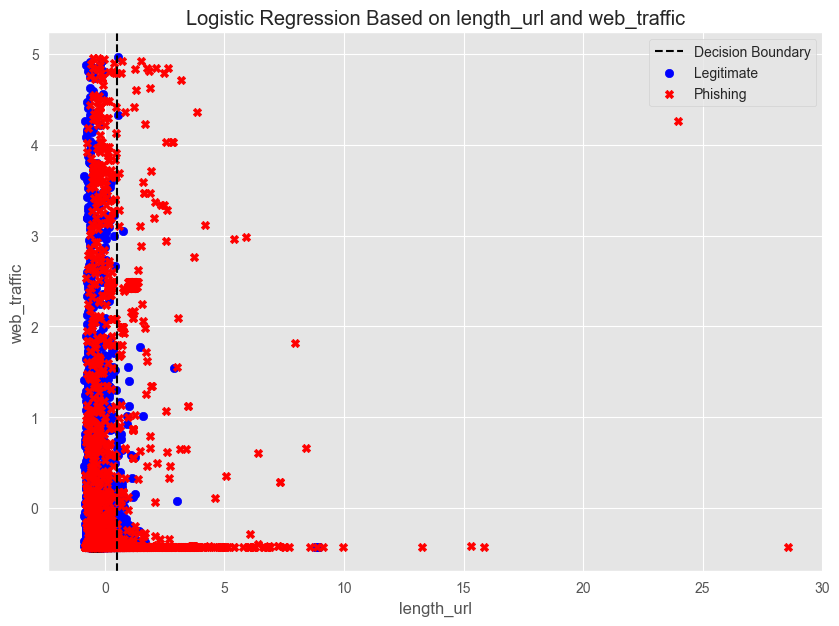

The amount of data analyzed is 9144.


In [24]:
plt.figure(figsize=(10, 7))

# Plot decision boundary
plt.axvline(0.5, color='k', linestyle='--', label='Decision Boundary')

# Plot predictions
feature1 = 'length_url'
feature2 = 'web_traffic'
plt.scatter(X_train[feature1][y_train == 0], X_train[feature2][y_train == 0], c='b', marker="o", label='Legitimate')
plt.scatter(X_train[feature1][y_train == 1], X_train[feature2][y_train == 1], c='r', marker="X", label='Phishing')

# Label the axes         
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

# Add title
plt.title('Logistic Regression Based on {} and {}'.format(feature1, feature2))

plt.show()

print("The amount of data analyzed is {}.".format(len(X_train)))

### Comentarios sobre la implementación
La implementación requiere de una comprensión de la matemática del modelo, para poder "traducir" ese entendimiento a código. De la misma manera que el comprender que tipos de datos estamos utilizando y su significado, para poder realizar un preprocesamiento adecuado. También es necesario conocer las métricas de desempeño para poder evaluar el modelo tras un análisis de cuál es la que más se adecua a las necesidades del problema.

## Task 2.2 | KNN

### Entrenamiento sin librerías

In [25]:
# function to calculate the Euclidean distance between two data points
def euclideanDistance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [26]:
# function to find the k nearest neighbors based on the calculated distances
def getNeighbors(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclideanDistance(x_test, X_train[i])
        distances.append((X_train[i], y_train[i], dist))
    distances.sort(key=lambda x: x[2])
    neighbors = []
    for i in range(k):
        neighbors.append((distances[i][0], distances[i][1]))
    return neighbors

In [27]:
# classification method
def predictClassification(X_train, y_train, x_test, k):
    neighbors = getNeighbors(X_train, y_train, x_test, k)
    classes = {}
    for i in range(len(neighbors)):
        response = neighbors[i][1]
        if response in classes:
            classes[response] += 1
        else:
            classes[response] = 1
    sorted_classes = sorted(classes.items(), key=lambda x: x[1], reverse=True)
    predicted_class = sorted_classes[0][0]
    num_predictions = sorted_classes[0][1]
    return predicted_class, num_predictions

In [28]:
# knn class to stablish an instance
class KNNAlgorithm:
    def __init__(self, groups=3):
        self.k = groups

    def fit(self, X_data_train, y_data_train):
        self.XTrain = X_data_train
        self.yTrain = y_data_train

    def predict(self, X_data_test):
        predictions = [self._predict(x) for x in X_data_test]
        return predictions

    def _predict(self, x):
        distances = [self.euclideanDistance(x, x_train) for x_train in self.XTrain]
        k_indices = np.argsort(distances)[:self.k]
        k_neighbors = [self.yTrain[i] for i in k_indices]
        most_common = Counter(k_neighbors).most_common()
        predicted_class = most_common[0][0]
        num_predictions = most_common[0][1]
        return predicted_class, num_predictions

    def euclideanDistance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

In [29]:
knn_model = KNNAlgorithm(groups=2)

# training
knn_model.fit(X_train.values, y_train.values)
predictions = knn_model.predict(X_test.values)
predicted_classes = np.array([pred[0] for pred in predictions])

In [30]:
acc = accuracy_score(y_test, predicted_classes)
print("Accuracy:", acc)

Accuracy: 0.9286964129483815


### Entrenamiento con librerías

In [31]:
# create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
# predict the test set results
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9352580927384077


(GeeksforGeeks, 2019)

### Gráficas de grupos encontrados

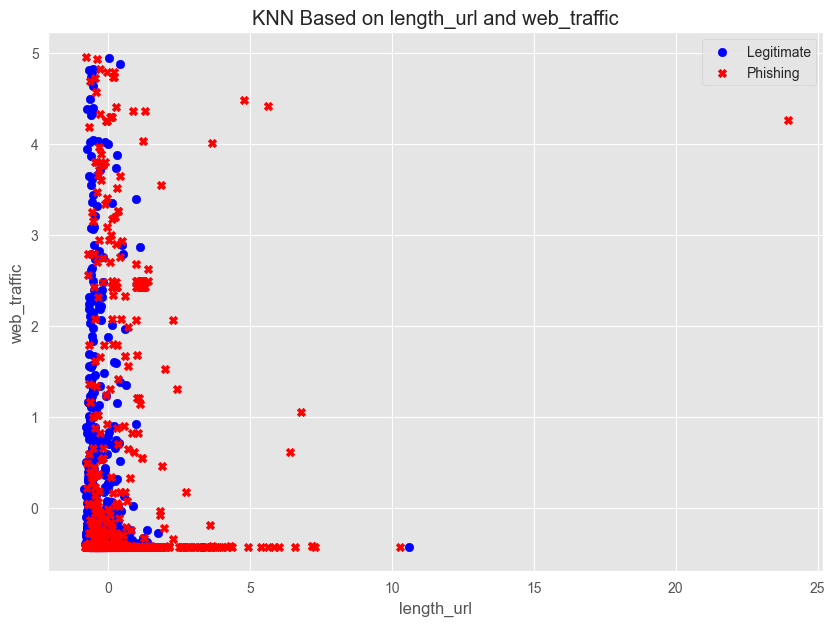

In [37]:
plt.figure(figsize=(10, 7))

# Plot predictions
feature1 = 'length_url'
feature2 = 'web_traffic'
# Plot with the predictions variable
plt.scatter(X_test[feature1][y_pred == 0], X_test[feature2][y_pred == 0], c='b', marker="o", label='Legitimate')
plt.scatter(X_test[feature1][y_pred == 1], X_test[feature2][y_pred == 1], c='r', marker="X", label='Phishing')

# Label the axes
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

# Add title
plt.title('KNN Based on {} and {}'.format(feature1, feature2))

plt.show()

### ¿Qué implementación fue mejor? ¿Por qué?
Al evaluar las dos implementaciones del algoritmo KNN, es evidente que la versión que empleó la biblioteca scikit-learn para el entrenamiento de datos mostró un desempeño ligeramente superior en comparación con la implementación desde cero. La precisión alcanzada fue del 83.29% (0.8329) para la implementación con scikit-learn, mientras que la versión sin librerías logró una precisión del 78.35% (0.7835). Este incremento en la precisión sugiere que la implementación con las librerías se pudo haber ajustado de manera más efectiva los parámetros del modelo o aplicado técnicas adicionales de optimización durante el entrenamiento.

Al profundizar en los resultados de las matrices de confusión, se manifiesta que la alternativa con scikit-learn exhibió un mayor número de verdaderos positivos (TP) [893 vs 945] y verdaderos negativos (TN) [898 vs 959]. Además, se observó una reducción significativa en los falsos positivos (FP) [229 vs 168] y falsos negativos (FN) en comparación con la implementación desde cero [266 vs 219] (Evidently AI Team, 2024)). 

Estos hallazgos indican que la aplicación de librerías para el entrenamiento de datos demostró una capacidad de clasificación más robusta y una menor propensión a errores en la predicción del modelo.

## Referencias

Evidently AI Team. (2024). How to interpret a confusion matrix for a machine learning model. Evidentlyai. https://www.evidentlyai.com/classification-metrics/confusion-matrix

GeeksforGeeks. (2019). ML   Implementation of KNN classifier using Sklearn. https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/